In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model,Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of ham and spam messages')

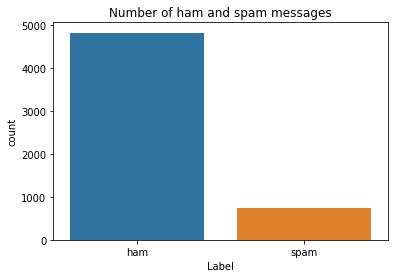

In [6]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [7]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

**DATA PROCESSING**

In [9]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)
sequences_matrix

array([[  0,   0,   0, ...,   3,  68,  88],
       [  0,   0,   0, ...,   0,  66,   4],
       [  0,   0,   0, ...,   6, 302, 147],
       ...,
       [  0,   0,   0, ...,  10, 149, 104],
       [  0,   0,   0, ..., 321,  34, 449],
       [  0,   0,   0, ...,   4, 593,   8]], dtype=int32)

In [10]:
tok.index_word

{1: 'i',
 2: 'to',
 3: 'you',
 4: 'a',
 5: 'the',
 6: 'u',
 7: 'and',
 8: 'is',
 9: 'in',
 10: 'me',
 11: 'my',
 12: 'for',
 13: 'your',
 14: 'it',
 15: 'of',
 16: 'call',
 17: 'have',
 18: '2',
 19: 'on',
 20: 'now',
 21: 'that',
 22: 'are',
 23: 'so',
 24: 'but',
 25: 'do',
 26: 'not',
 27: 'or',
 28: 'can',
 29: "i'm",
 30: 'at',
 31: 'be',
 32: 'ur',
 33: 'get',
 34: 'will',
 35: 'if',
 36: 'just',
 37: 'with',
 38: 'no',
 39: 'we',
 40: 'this',
 41: '4',
 42: 'gt',
 43: 'up',
 44: 'lt',
 45: 'when',
 46: 'ok',
 47: 'from',
 48: 'all',
 49: 'how',
 50: 'out',
 51: 'go',
 52: 'free',
 53: 'what',
 54: 'know',
 55: 'then',
 56: 'good',
 57: 'like',
 58: 'got',
 59: 'was',
 60: 'come',
 61: 'its',
 62: 'only',
 63: 'time',
 64: 'am',
 65: 'day',
 66: 'he',
 67: 'send',
 68: 'want',
 69: 'there',
 70: 'text',
 71: 'love',
 72: 'txt',
 73: 'as',
 74: 'going',
 75: 'one',
 76: 'by',
 77: 'about',
 78: "i'll",
 79: 'lor',
 80: 'need',
 81: 'n',
 82: 'home',
 83: 'sorry',
 84: 'r',
 85: 's

**CREATING MODELS AND ADDING LAYERS**

In [11]:
TOT_SIZE = len(tok.word_index)+1
lstm_model = Sequential()
lstm_model.add(Embedding(TOT_SIZE, 32, input_length=max_len))
lstm_model.add(LSTM(100))
lstm_model.add(Dropout(0.4))
lstm_model.add(Dense(20, activation="relu"))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(1, activation = "sigmoid"))

In [12]:
lstm_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 32)           263936    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 20)                2020      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 319,177
Trainable params: 319,177
Non-trai

**FIX THE MODEL**

In [13]:
lstm_model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,
          workers=10,
           callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
30/30 [==============================] - 19s 539ms/step - loss: 0.4567 - accuracy: 0.8556 - val_loss: 0.2990 - val_accuracy: 0.8534
Epoch 2/10
30/30 [==============================] - 14s 467ms/step - loss: 0.1901 - accuracy: 0.9409 - val_loss: 0.1373 - val_accuracy: 0.9620


**SAVE THE MODEL**

In [14]:
lstm_model.save('sms.h5')

**TEST THE MODEL**

In [16]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [17]:
acc = lstm_model.evaluate(test_sequences_matrix,Y_test)

27/27 [==============================] - 1s 20ms/step - loss: 0.1072 - accuracy: 0.9737


In [18]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(acc[0],acc[1]))

Test set
  Loss: 0.107
  Accuracy: 0.974
